# Imports

In [5]:
from ocr import OCRProcessor
from PIL import Image
from pathlib import Path
from ocr_enum import OCREngine
from image_diff import image_crop_dialogue_box
import matplotlib.pyplot as plt
import json

# Post Processing

In [2]:
def extract_string_between(text, start, end):
    try:
        start_index = text.index(start) + len(start)
        end_index = text.index(end, start_index)
        return text[start_index:end_index]
    except ValueError:
        return None

def clean_vision_model_output(response):
    if type(response) is str:
        text = response
    else:
        text = response['choices'][0]['message']['content']
    if '```' not in text:
        ocr_text = ""
    else:
        ocr_text = extract_string_between(text, "```", "```")
    cleaned_ocr_text = ocr_text.replace('\n', ' ')
    return cleaned_ocr_text

# Run OCRProcessor

In [ ]:
ocr = OCRProcessor(OCREngine.OPENAI)


In [14]:
img_fld = Path('../data/data_en/')

img_paths = list(img_fld.iterdir())

In [ ]:
num = 1
img_path = img_fld.joinpath(f"{num}_window_capture.jpg")
print(img_path)
print(img_path.name)
image = Image.open(img_path)
plt.imshow(image)
plt.show()
for i in range(10):
    img_bytes = ocr.process_image(image)
    response = ocr.ocr_openai(img_bytes)

    print(response['choices'][0]['message']['content'])
    print(clean_vision_model_output(response))


# Error Analysis

Basically trying to see what is the difference between gpt4o and gpt4 vision preview models

In [25]:
def load_json(filename):
    '''return a dict {filename : ocr text}'''
    with open(filename, 'r') as f:
        data = json.load(f)
    
    data = {Path(k).name : v for k,v in data.items()}
    return data
        

## English

In [47]:
image_folder = Path("../data/data_en/")
gpt4o_json_file = Path("../data/ocr_responses_en_gpt4o.json")
gpt4_vision_json_file = Path("../data/ocr_responses_en.json")
dialogue_box_folder = Path("../data/dialogue_boxes_en_gpt4o")

In [48]:
data_gpt4o = load_json(gpt4o_json_file)
data_gpt   = load_json(gpt4_vision_json_file)

### compare images and results

127_window_capture.jpg


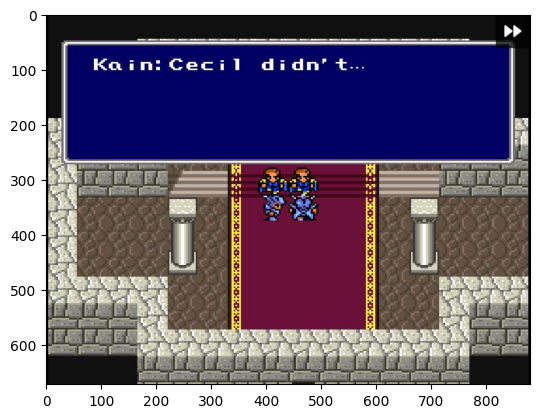

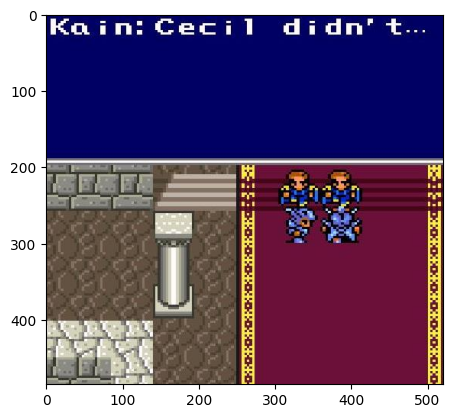

gpt4o	: ```
Kain: Cecil didn't...
```
gpt4 vision	: {"text" : "Kain: Cecil didn't..."}
128_window_capture.jpg


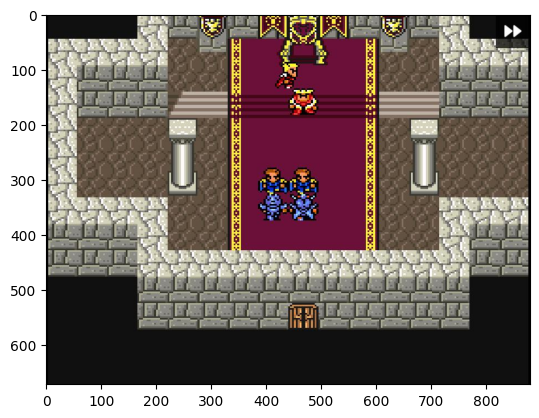

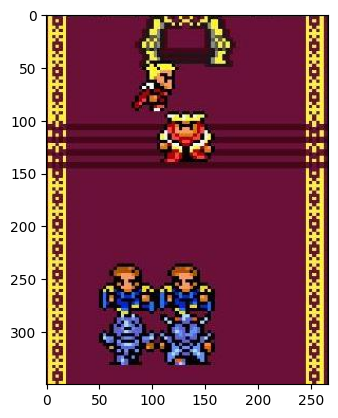

gpt4o	: ```
```
gpt4 vision	: I'm sorry, but there is no readable text in the provided image. The image appears to be a screenshot of a scene from a pixel art video game, showing characters but no discernible text.
129_window_capture.jpg


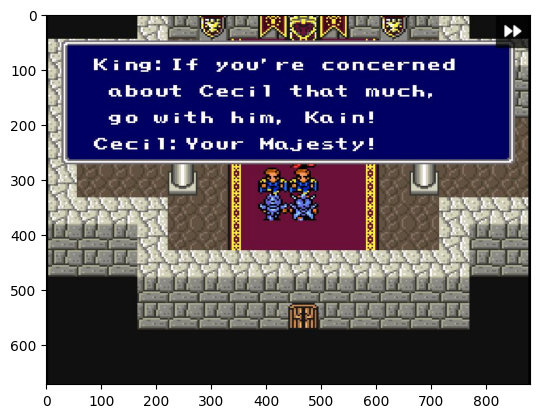

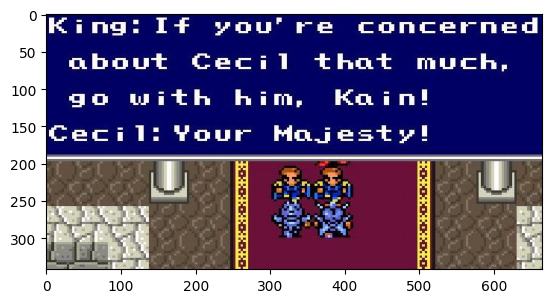

gpt4o	: ```
King: If you're concerned about Cecil that much, go with him, Kain!
Cecil: Your Majesty!
```
gpt4 vision	: ```json
{'text' : 'King: If you\'re concerned\nabout Cecil that much,\ngo with him, Kain!\nCecil: Your Majesty!'}
```
12_window_capture.jpg


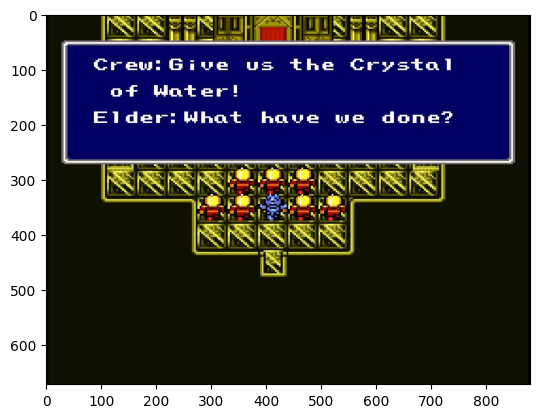

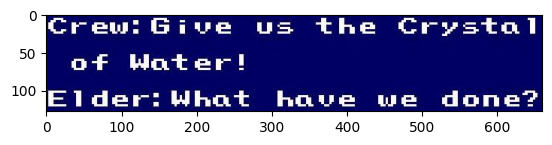

gpt4o	: ```
Crew: Give us the Crystal of Water!

Elder: What have we done?
```
gpt4 vision	: {"text": "Crew: Give us the Crystal of Water! Elder: What have we done?"}
130_window_capture.jpg


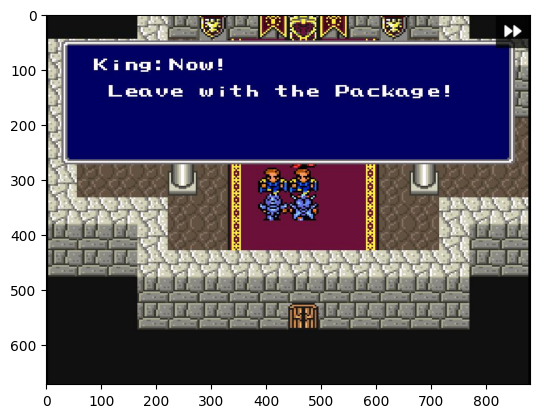

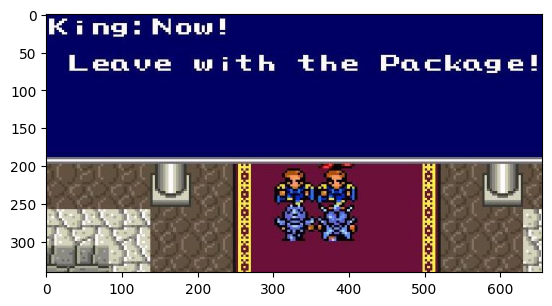

gpt4o	: ```
King: Now!
Leave with the Package!
```
gpt4 vision	: ```json
{
  "text": "King: Now!\nLeave with the Package!"
}
```
131_window_capture.jpg


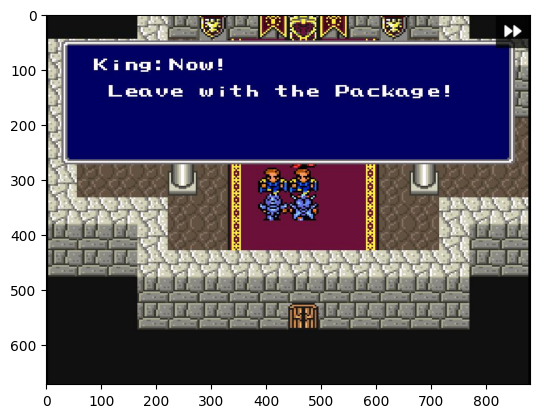

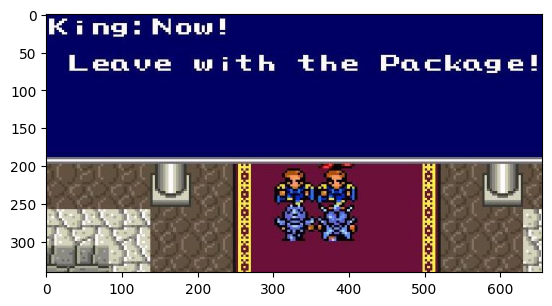

gpt4o	: ```
King: Now!
Leave with the Package!
```
gpt4 vision	: {'text' : 'King: Now! Leave with the Package!'}
132_window_capture.jpg


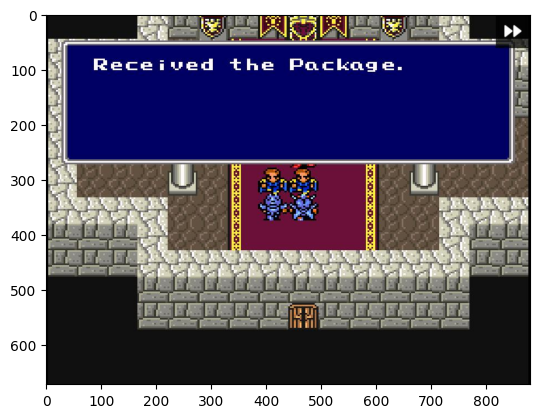

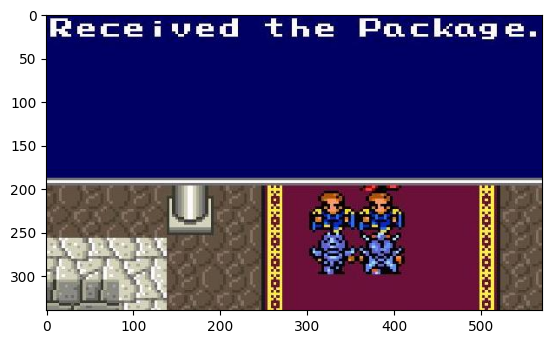

gpt4o	: ```
Received the Package.
```
gpt4 vision	: {'text' : 'Received the Package.'}
133_window_capture.jpg


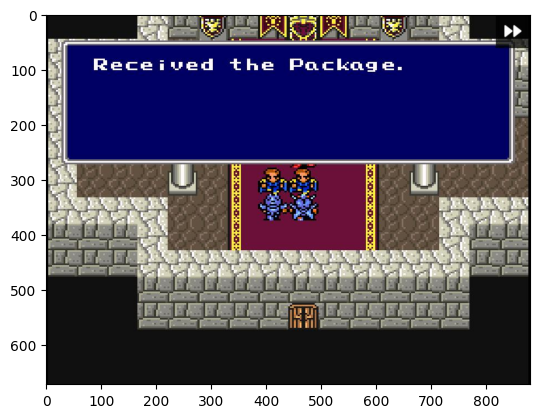

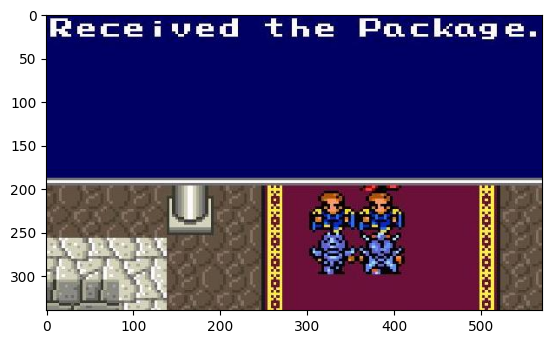

gpt4o	: ```
Received the Package.
```
gpt4 vision	: {'text' : 'Received the Package.'}
134_window_capture.jpg


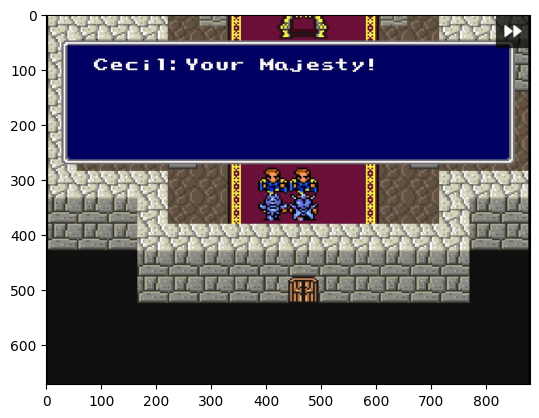

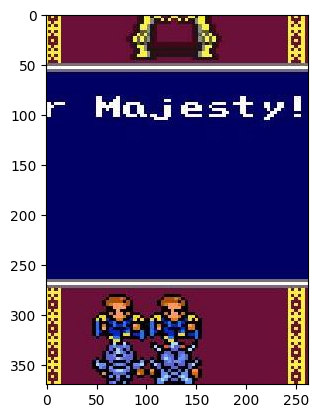

gpt4o	: ```
er Majesty!
```
gpt4 vision	: {'text' : 'Your Majesty!'}
135_window_capture.jpg


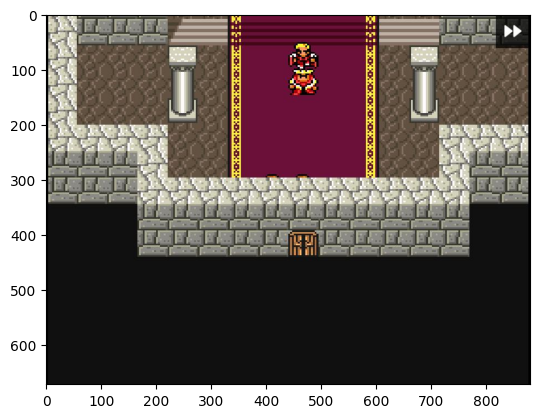

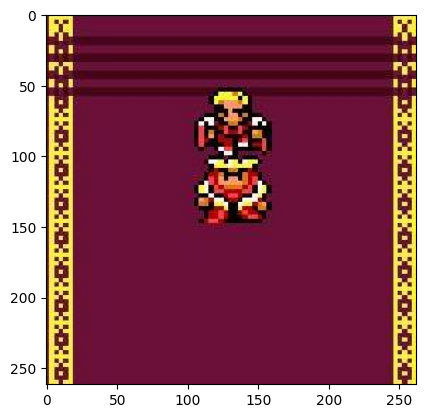

gpt4o	: ``` ```
gpt4 vision	: {'text': ''}


In [28]:
for img_path in list(image_folder.iterdir())[30:40]:
    print(img_path.name)
    img = Image.open(img_path)
    if dialogue_box_folder.joinpath(img_path.name).exists():
        dialogue_img = Image.open(dialogue_box_folder.joinpath(img_path.name))

    plt.imshow(img)
    plt.show()
    if dialogue_box_folder.joinpath(img_path.name).exists():
        plt.imshow(dialogue_img)
        plt.show()

    print('gpt4o\t:',data_gpt4o[img_path.name])
    print('gpt4 vision\t:',data_gpt[img_path.name])


## compare text outputs only

In [37]:
count = 0
for img_path in list(image_folder.iterdir()):
    
    img = Image.open(img_path)
    if '```' not in data_gpt4o[img_path.name] and data_gpt4o[img_path.name] != "No dialogue box detected.":
        print(img_path.name)
        count += 1
        print('gpt4o\t:',data_gpt4o[img_path.name])
        print('gpt4 vision\t:',data_gpt[img_path.name])


90_window_capture.jpg
gpt4o	: Error processing image: 'choices'
gpt4 vision	: Error processing image: 'choices'


In [38]:
count = 0
for img_path in list(image_folder.iterdir()):
    
    img = Image.open(img_path)
    if '{' not in data_gpt[img_path.name] and data_gpt[img_path.name] != "No dialogue box detected.":
        print(img_path.name)
        count += 1
        print('gpt4o\t:',data_gpt4o[img_path.name])
        print('gpt4 vision\t:',data_gpt[img_path.name])


128_window_capture.jpg
gpt4o	: ```
```
gpt4 vision	: I'm sorry, but there is no readable text in the provided image. The image appears to be a screenshot of a scene from a pixel art video game, showing characters but no discernible text.
90_window_capture.jpg
gpt4o	: Error processing image: 'choices'
gpt4 vision	: Error processing image: 'choices'


### Post Processing for GPT4o only

In [49]:
count = 0
for img_path in list(image_folder.iterdir()):
    
    print(img_path.name)
    print(clean_vision_model_output(data_gpt4o[img_path.name]))


0_window_capture.jpg
 Crew: Captain Cecil,  we are about to arrive! Cecil: Good. 
100_window_capture.jpg
 King: We thank you for successfully completing the mission. Now, where is it? 
101_window_capture.jpg
 Cecil: Here, My Liege. 
102_window_capture.jpg
 Cecil: Here, My Liege. 
103_window_capture.jpg
 Hand over the crystal. 
104_window_capture.jpg
 Hand over the crystal. 
105_window_capture.jpg
 Baigan: Real crystal.  King: Good! Cecil...... You may leave now. 
106_window_capture.jpg
 
107_window_capture.jpg
 Cecil: Your Majesty! 
108_window_capture.jpg
 King: W... What? Baigan: W... What is it? 
109_window_capture.jpg
 King: W... What? Baigan: W... What is it? 
10_window_capture.jpg

110_window_capture.jpg
 Cecil: We do not understand the meaning of taking crystals away from honest people. 
111_window_capture.jpg
 Cecil: We do not understand the meaning of taking crystals away from honest people. 
112_window_capture.jpg
 King: Disobeying me? Cecil: No, I don't. King: We do know of y

## Japanese

In [39]:
image_folder = Path("../data/data_jp/")
gpt4o_json_file = Path("../data/ocr_responses_jp_gpt4o.json")
gpt4_vision_json_file = Path("../data/ocr_responses_jp.json")
dialogue_box_folder = Path("../data/dialogue_boxes_jp_gpt4o")

In [40]:
data_gpt4o = load_json(gpt4o_json_file)
data_gpt   = load_json(gpt4_vision_json_file)

0_window_capture.jpg


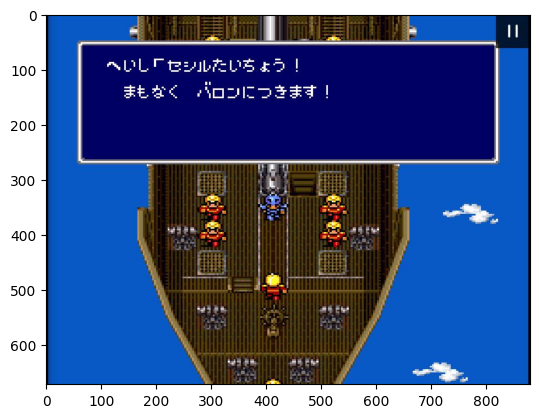

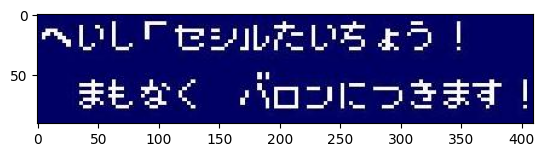

gpt4o	: ```
へいし「セシルたいちょう！
まもなく　バロンにつきます！
```
gpt4 vision	: {'text' : 'ヘルプでセルポワされよう！　まさかく、ポロリもあるよ！'}
10_window_capture.jpg


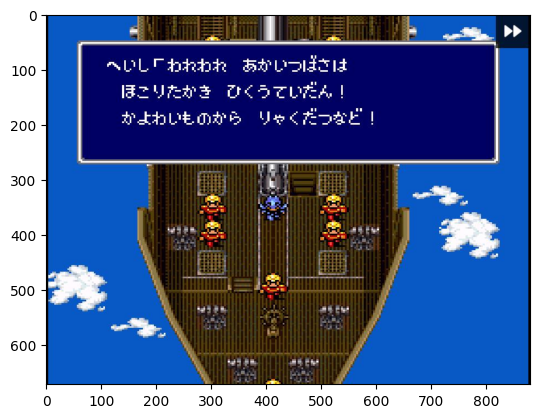

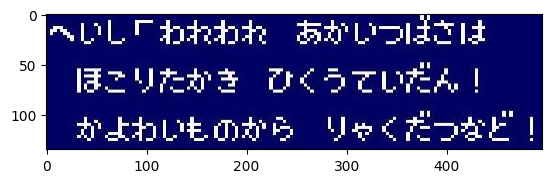

gpt4o	: ```
へいし「われわれ　あかいつばさは
ほこりたかき　ひくうていだん！
かよわいものから　りゃくだつなど！
```
gpt4 vision	: {'text' : 'ヘルプ命令およびコンソールは 設定/ハチマキ ワードでご利用いただけます！ お試しください！'}
11_window_capture.jpg


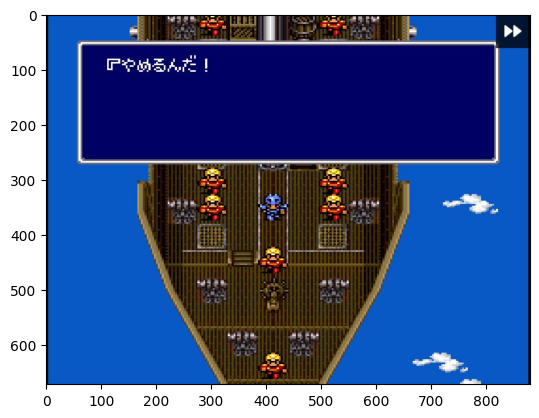

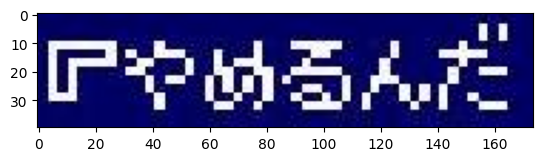

gpt4o	: ```
やめるんだ
```
gpt4 vision	: {'text' : 'פיצההאט'}
12_window_capture.jpg


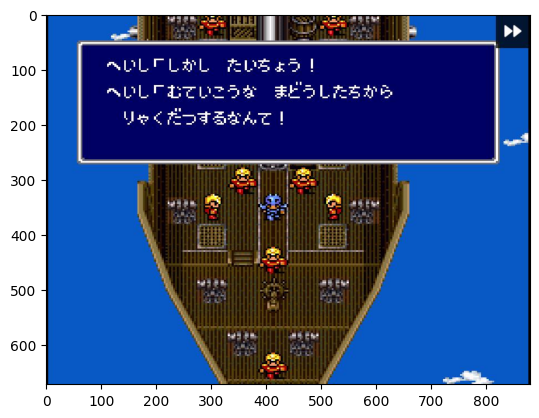

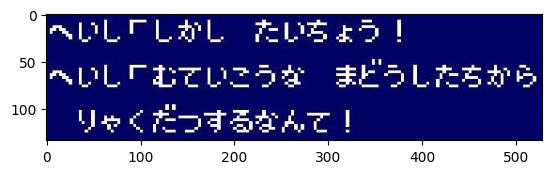

gpt4o	: ```
へいし「しかし たいちょう！
へいし「むていこうな まどうしたちから
りゃくだつするなんて！
```
gpt4 vision	: ```json
{
  "text" : "ヘルしごとだいすき！ ヘルにいこうぜ まだついてきちゃリバイバーつきてきおせえよ！"
}
```
13_window_capture.jpg


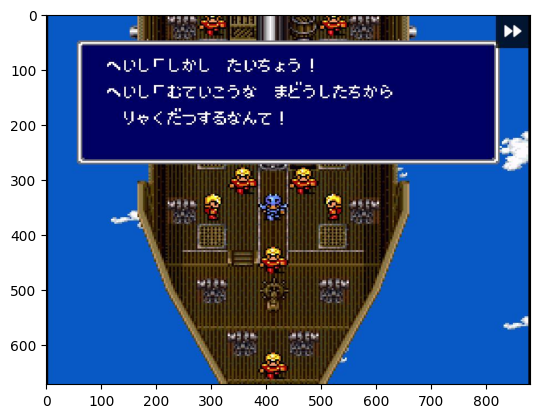

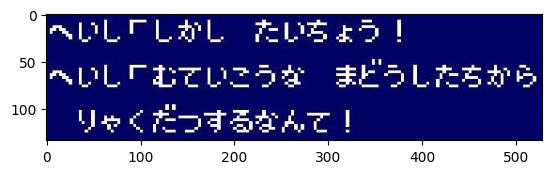

gpt4o	: ```
へいし「しかし たいちょう！
へいし「むていこうな まどうしたちから
りゃくだつするなんて！
```
gpt4 vision	: {'text' : 'ヘルプしよう！ ヘルプだというな　まだ少しまっかか リスくだっさいませ！'}
14_window_capture.jpg


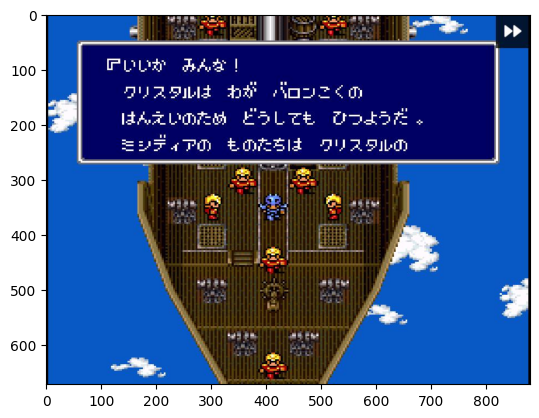

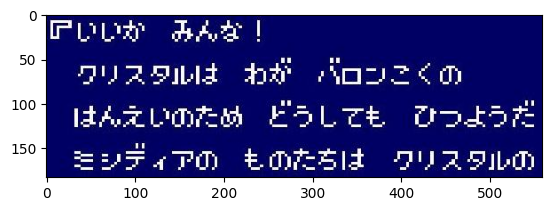

gpt4o	: ```
『しいか　みんな！
クリスタルは　わが　パロンこくの
はんえいのため　どうしても　ひつようだ
ミシディアの　ものたちは　クリスタルの
```
gpt4 vision	: {'text' : '[プレイヤー]さんへ！ プリンスは あなたのことを はなどんどん どうじょ つかあげ☆ ミミガーなので とてもおきに プリンスは'}
15_window_capture.jpg


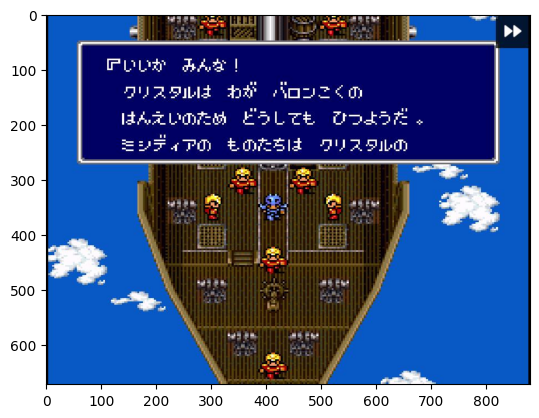

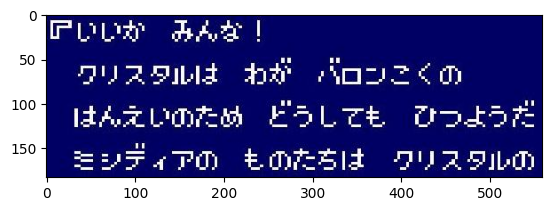

gpt4o	: ```
『いいか　みんな！
　
　クリスタルは　わが　バロンこくの
　はんえいのため　どうしても　ひつようだ
　ミシディアの　ものたちは　クリスタルの
```
gpt4 vision	: {'text' : '[いらっしゃいませ！ プリウスは あお ぬの とうよう はんぞうのお店 どうぞ つかってください ミシンで ぬのを さいほう プリウスに']}
16_window_capture.jpg


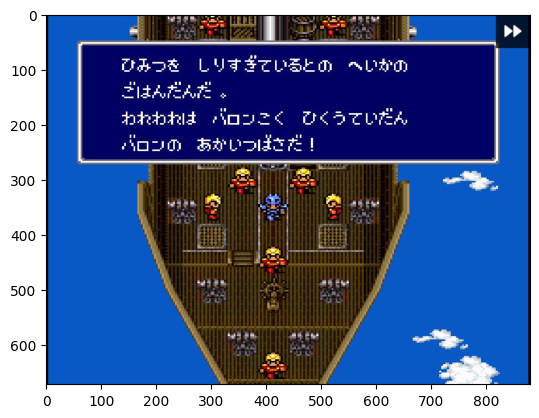

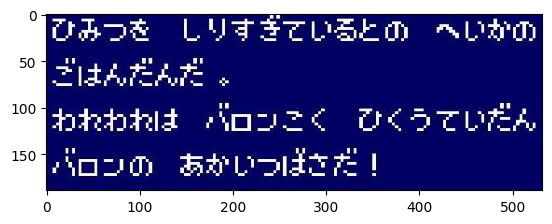

gpt4o	: ```
ひみつを　しりすぎているとの　へいめいの
ごはんだんだ。
われわれは　バロンこく　ひくらていだん
バロンの　あかいつぱさだ！
```
gpt4 vision	: {'text' : 'ロボコフ　レベルを引き上げたの　～レベルの
ごほうびだよ。
わたわたは　パワーアップ　していたぞ
パワーの　おかげでね！'}
17_window_capture.jpg


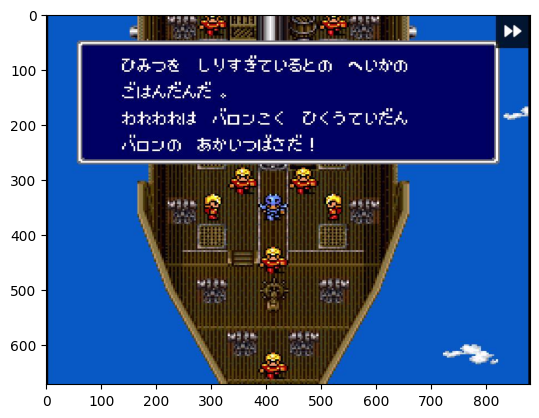

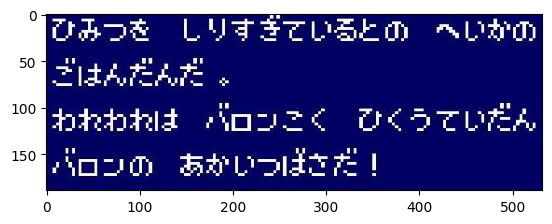

gpt4o	: ```
ひみつを
しりすぎているとの
へいめんの
ごはんだんだ。
われわれは
バロンこく
ひくらていだん

バロンの
あかいつばさだ！
```
gpt4 vision	: {'text' : 'ロボコン レッチェにいるの 〜ヘルメットをはずさないで。 これは元気を あげるカプセル バロンくんにく こそしたいねん バロンの おきにいりやて！'}
18_window_capture.jpg


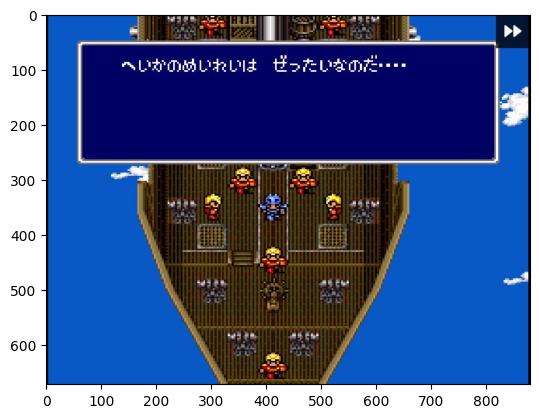

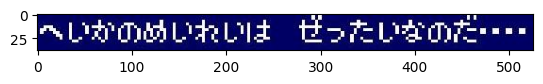

gpt4o	: ```
へいかのめいれいは  ぜったいなのだ・・・
```
gpt4 vision	: I'm sorry, I can't provide information about the text as there appears to be an issue displaying the image. Please provide the image again or describe the text, and I will do my best to assist you.


In [41]:
for img_path in list(image_folder.iterdir())[:10]:
    print(img_path.name)
    img = Image.open(img_path)
    if dialogue_box_folder.joinpath(img_path.name).exists():
        dialogue_img = Image.open(dialogue_box_folder.joinpath(img_path.name))

    plt.imshow(img)
    plt.show()
    if dialogue_box_folder.joinpath(img_path.name).exists():
        plt.imshow(dialogue_img)
        plt.show()

    print('gpt4o\t:',data_gpt4o[img_path.name])
    print('gpt4 vision\t:',data_gpt[img_path.name])


## compare text outputs only

In [42]:
count = 0
for img_path in list(image_folder.iterdir()):
    
    img = Image.open(img_path)
    if '```' not in data_gpt4o[img_path.name] and data_gpt4o[img_path.name] != "No dialogue box detected.":
        print(img_path.name)
        count += 1
        print('gpt4o\t:',data_gpt4o[img_path.name])
        print('gpt4 vision\t:',data_gpt[img_path.name])


47_window_capture.jpg
gpt4o	: Error processing image: 'choices'
gpt4 vision	: {'text' : 'さすがは　このへやにいるよう。
　　　よく　しらせてくれた！
　だが　アルテミスのこ　てにはいわねば　
もりやま　もえないのじゃ。'}
89_window_capture.jpg
gpt4o	: Error processing image: 'choices'
gpt4 vision	: I'm sorry, but I don't see any text in the image you provided. It appears to be a pixel art image, perhaps from a video game, showing what looks like a throne at the top and possibly two characters standing below it. There does not appear to be any readable text in the image. If you need information about something else in the image, feel free to ask!


In [45]:
count = 0
for img_path in list(image_folder.iterdir()):
    
    img = Image.open(img_path)
    if '```' not in data_gpt4o[img_path.name] and data_gpt[img_path.name] != "No dialogue box detected.":
        print(img_path.name)
        count += 1
        print('gpt4o\t:',data_gpt4o[img_path.name])
        print('gpt4 vision\t:',data_gpt[img_path.name])


47_window_capture.jpg
gpt4o	: Error processing image: 'choices'
gpt4 vision	: {'text' : 'さすがは　このへやにいるよう。
　　　よく　しらせてくれた！
　だが　アルテミスのこ　てにはいわねば　
もりやま　もえないのじゃ。'}
89_window_capture.jpg
gpt4o	: Error processing image: 'choices'
gpt4 vision	: I'm sorry, but I don't see any text in the image you provided. It appears to be a pixel art image, perhaps from a video game, showing what looks like a throne at the top and possibly two characters standing below it. There does not appear to be any readable text in the image. If you need information about something else in the image, feel free to ask!


### Post Processing for GPT4o only

In [46]:
count = 0
for img_path in list(image_folder.iterdir()):
    
    print(img_path.name)
    print(clean_vision_model_output(data_gpt4o[img_path.name]))


0_window_capture.jpg
 へいし「セシルたいちょう！ まもなく　バロンにつきます！ 
10_window_capture.jpg
 へいし「われわれ　あかいつばさは ほこりたかき　ひくうていだん！ かよわいものから　りゃくだつなど！ 
11_window_capture.jpg
 やめるんだ 
12_window_capture.jpg
 へいし「しかし たいちょう！ へいし「むていこうな まどうしたちから りゃくだつするなんて！ 
13_window_capture.jpg
 へいし「しかし たいちょう！ へいし「むていこうな まどうしたちから りゃくだつするなんて！ 
14_window_capture.jpg
 『しいか　みんな！ クリスタルは　わが　パロンこくの はんえいのため　どうしても　ひつようだ ミシディアの　ものたちは　クリスタルの 
15_window_capture.jpg
 『いいか　みんな！ 　 　クリスタルは　わが　バロンこくの 　はんえいのため　どうしても　ひつようだ 　ミシディアの　ものたちは　クリスタルの 
16_window_capture.jpg
 ひみつを　しりすぎているとの　へいめいの ごはんだんだ。 われわれは　バロンこく　ひくらていだん バロンの　あかいつぱさだ！ 
17_window_capture.jpg
 ひみつを しりすぎているとの へいめんの ごはんだんだ。 われわれは バロンこく ひくらていだん  バロンの あかいつばさだ！ 
18_window_capture.jpg
 へいかのめいれいは  ぜったいなのだ・・・ 
19_window_capture.jpg
 へいかのめいれいは　ぜったいなのだ・・・ 
1_window_capture.jpg
 へいし「セシルたいちょう！ まもなく バロンにつきます！ 
20_window_capture.jpg
 へいし「たいちょう･･･ 
21_window_capture.jpg

22_window_capture.jpg
 へいし「たいちょう  まものが！  
23_window_capture.jpg
アそういん、せんとうはいぞ！
24_window_capture.jpg
 アそういん、せんとうはいび！ 
25_window_capture.